# Projekti IIWARI


In [1]:
# Run this code if you get errors with missing requirements
import sys
!{sys.executable} -m pip install mysql-connector

import pandas as pd
import mysql.connector

mydb = mysql.connector.connect(
  host="iiwari-mariadb-server",
  user="root",
  passwd="d41k4Duu",
  database="iiwari_org"
)


In [2]:
# Check database contents
mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE node_id = 54016 AND timestamp > '2019-03-20 09:00:00.000000+00:00' AND timestamp < '2019-03-21 22:05:08.078133+00:00' LIMIT 20000 " );
df = pd.DataFrame(mycursor.fetchall())

print(df)

      node_id                            timestamp   x     y  z    q
0       54016  b'2019-03-21 07:54:39.687645+00:00' -50    50  0  233
1       54016  b'2019-03-21 07:54:40.686633+00:00' -50    50  0   76
2       54016  b'2019-03-21 07:54:41.687915+00:00' -50    50  0   99
3       54016  b'2019-03-21 07:54:43.687457+00:00' -50    50  0   96
4       54016  b'2019-03-21 07:54:44.687414+00:00' -50    50  0   32
...       ...                                  ...  ..   ... ..  ...
6313    54016  b'2019-03-21 11:52:47.687037+00:00' -50  2797  0  149
6314    54016  b'2019-03-21 11:52:48.687442+00:00' -50  2846  0  227
6315    54016  b'2019-03-21 11:52:49.687187+00:00' -50  2887  0  157
6316    54016  b'2019-03-21 11:52:50.687142+00:00' -50  2920  0  143
6317    54016  b'2019-03-21 11:52:51.691455+00:00' -50  2946  0   97

[6318 rows x 6 columns]


In [30]:
mylol = mydb.cursor(dictionary=True)
mylol.execute("SELECT node_id, timestamp, x, y FROM SensorData WHERE timestamp > '2019-05-24 06:05:08.078133+00:00' AND timestamp < '2019-05-24 23:59:08.078133+00:00'  AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND   q <100 AND z = 0");
df = pd.DataFrame(mylol.fetchall())
print(database)

        node_id                            timestamp    x     y
0         52535  b'2019-05-24 06:05:08.987028+00:00'  209  2551
1         52535  b'2019-05-24 06:05:08.987031+00:00'  209  2551
2         53011  b'2019-05-24 06:05:08.987034+00:00'   57  2623
3         53011  b'2019-05-24 06:05:09.987113+00:00'    4  2671
4         51751  b'2019-05-24 06:05:11.986785+00:00'   89  2521
...         ...                                  ...  ...   ...
198573    53130  b'2019-05-24 23:59:03.986914+00:00'   68  2627
198574    53130  b'2019-05-24 23:59:04.988275+00:00'  121  2613
198575    51889  b'2019-05-24 23:59:06.988082+00:00'   30  2604
198576    52099  b'2019-05-24 23:59:06.994592+00:00'  493  2006
198577    51889  b'2019-05-24 23:59:07.987202+00:00'    4  2605

[198578 rows x 4 columns]


In [4]:
mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, COUNT(node_id), timestamp FROM SensorData   WHERE timestamp > '2019-05-24 13:05:08.078133+00:00' AND timestamp < '2019-05-29 13:05:08.078133+00:00'  AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND   q <100 AND z = 0 GROUP BY node_id ");


In [5]:
df = pd.DataFrame(mycursor.fetchall())
print(df)
len(df)

    node_id  COUNT(node_id)                            timestamp
0      3200           54824  b'2019-05-24 13:18:02.994616+00:00'
1      3224           11449  b'2019-05-24 15:40:09.994598+00:00'
2      3240            1879   b'2019-05-25 06:39:14.99468+00:00'
3     51719           32469  b'2019-05-24 16:18:18.994673+00:00'
4     51735          102006  b'2019-05-25 06:38:44.994583+00:00'
5     51751           45886  b'2019-05-24 13:05:08.987771+00:00'
6     51850          104681  b'2019-05-25 05:08:54.995013+00:00'
7     51866          113297  b'2019-05-24 13:06:52.995091+00:00'
8     51889          268178  b'2019-05-24 13:05:31.995048+00:00'
9     51968           25528  b'2019-05-24 13:17:21.994477+00:00'
10    51976           66253  b'2019-05-24 13:05:08.987162+00:00'
11    51992            1325  b'2019-05-25 06:25:51.994608+00:00'
12    52003           13915  b'2019-05-25 06:40:26.994632+00:00'
13    52008               1  b'2019-05-28 09:14:51.995571+00:00'
14    52023              

23

In [31]:
len(df)

#nodet = pd.DataFrame()
nodes = pd.DataFrame()
nodes['node_id'] = database['node_id']
#nodet['node_id'] = df['node_id']

nodes['x'] = database['x']
nodes['y'] = database['y']


#nodet['count'] = df['COUNT(node_id)']
#nodet['prosenttiosuus'] = 100 * (df['COUNT(node_id)'] / (df['COUNT(node_id)'].sum()))
nodes['timestamp'] = database['timestamp'].astype(str)
nodes['timestamp'].dtype
nodes['timestamp'] = nodes['timestamp'].str.slice(2, -7)


#print(nodes['timestamp'])

#print(nodet)
#print(df['COUNT(node_id)'].sum())
#print((df['COUNT(node_id)'] / (df['COUNT(node_id)'].sum())))





In [32]:
nodes['timestamp'] = nodes['timestamp'].astype('datetime64[ns]')
nodes['timestamp'] = pd.Series(nodes['timestamp']).dt.round("H")

print(nodes)

#nodes['prosenttiosuusaika'] = 100 * (df['COUNT(node_id)'] / (df['COUNT(node_id)'].sum()))

        node_id    x     y           timestamp
0         52535  209  2551 2019-05-24 06:00:00
1         52535  209  2551 2019-05-24 06:00:00
2         53011   57  2623 2019-05-24 06:00:00
3         53011    4  2671 2019-05-24 06:00:00
4         51751   89  2521 2019-05-24 06:00:00
...         ...  ...   ...                 ...
198573    53130   68  2627 2019-05-25 00:00:00
198574    53130  121  2613 2019-05-25 00:00:00
198575    51889   30  2604 2019-05-25 00:00:00
198576    52099  493  2006 2019-05-25 00:00:00
198577    51889    4  2605 2019-05-25 00:00:00

[198578 rows x 4 columns]


In [33]:

nodes.index = nodes['timestamp']
nodes.resample('M').mean()
print(nodes)

                     node_id    x     y           timestamp
timestamp                                                  
2019-05-24 06:00:00    52535  209  2551 2019-05-24 06:00:00
2019-05-24 06:00:00    52535  209  2551 2019-05-24 06:00:00
2019-05-24 06:00:00    53011   57  2623 2019-05-24 06:00:00
2019-05-24 06:00:00    53011    4  2671 2019-05-24 06:00:00
2019-05-24 06:00:00    51751   89  2521 2019-05-24 06:00:00
...                      ...  ...   ...                 ...
2019-05-25 00:00:00    53130   68  2627 2019-05-25 00:00:00
2019-05-25 00:00:00    53130  121  2613 2019-05-25 00:00:00
2019-05-25 00:00:00    51889   30  2604 2019-05-25 00:00:00
2019-05-25 00:00:00    52099  493  2006 2019-05-25 00:00:00
2019-05-25 00:00:00    51889    4  2605 2019-05-25 00:00:00

[198578 rows x 4 columns]


In [34]:
nodes = nodes.drop('x', axis=1)
nodes = nodes.drop('y', axis=1)
nodes = nodes.drop('timestamp', axis=1)
print(nodes)


                     node_id
timestamp                   
2019-05-24 06:00:00    52535
2019-05-24 06:00:00    52535
2019-05-24 06:00:00    53011
2019-05-24 06:00:00    53011
2019-05-24 06:00:00    51751
...                      ...
2019-05-25 00:00:00    53130
2019-05-25 00:00:00    53130
2019-05-25 00:00:00    51889
2019-05-25 00:00:00    52099
2019-05-25 00:00:00    51889

[198578 rows x 1 columns]


In [35]:

nodes = nodes.resample('H').count()
print(nodes)

                     node_id
timestamp                   
2019-05-24 06:00:00     5432
2019-05-24 07:00:00    12446
2019-05-24 08:00:00    12900
2019-05-24 09:00:00    11222
2019-05-24 10:00:00    13767
2019-05-24 11:00:00    11664
2019-05-24 12:00:00    10115
2019-05-24 13:00:00    12001
2019-05-24 14:00:00     8343
2019-05-24 15:00:00     6301
2019-05-24 16:00:00    10623
2019-05-24 17:00:00    16768
2019-05-24 18:00:00    11957
2019-05-24 19:00:00    11291
2019-05-24 20:00:00    10582
2019-05-24 21:00:00     9537
2019-05-24 22:00:00     9433
2019-05-24 23:00:00    10046
2019-05-25 00:00:00     4150


In [36]:
nodes['esintyvyysprosentti'] = 100 * (nodes['node_id'] / nodes['node_id'].sum())
print(nodes)

                     node_id  esintyvyysprosentti
timestamp                                        
2019-05-24 06:00:00     5432             2.735449
2019-05-24 07:00:00    12446             6.267562
2019-05-24 08:00:00    12900             6.496188
2019-05-24 09:00:00    11222             5.651180
2019-05-24 10:00:00    13767             6.932792
2019-05-24 11:00:00    11664             5.873762
2019-05-24 12:00:00    10115             5.093716
2019-05-24 13:00:00    12001             6.043469
2019-05-24 14:00:00     8343             4.201372
2019-05-24 15:00:00     6301             3.173060
2019-05-24 16:00:00    10623             5.349535
2019-05-24 17:00:00    16768             8.444037
2019-05-24 18:00:00    11957             6.021312
2019-05-24 19:00:00    11291             5.685927
2019-05-24 20:00:00    10582             5.328888
2019-05-24 21:00:00     9537             4.802647
2019-05-24 22:00:00     9433             4.750274
2019-05-24 23:00:00    10046             5.058969


nodes.groupby("timestamp").esintyvyysprosentti.mean()[:24].plot.bar(title='Kärryjen esiintyminen tunnettain')
plt.ylabel('Kärryjen prosenttiosuus %')
plt.xlabel('Tunnit')


In [37]:
#nodet.groupby("node_id").prosenttiosuus.mean().sort_values(ascending=False)[:23].plot.bar(title='Kärryjen esiintymistiheys 2019-05-24 - 2019-05-29')
#plt.ylabel('Prosenttiosuus %')
#plt.xlabel('Kärryn numero')



nodes = nodes[nodes.x > 900]


AttributeError: 'DataFrame' object has no attribute 'x'

In [53]:
table = pd.DataFrame(columns=list('NTXYZQ'))
table.N = df.node_id
table.T = df.timestamp
table.X = df.x
table.Y = df.y
print(table)


            N                                    T    X     Y    Z    Q
0       52535  b'2019-05-24 06:05:08.987028+00:00'  209  2551  NaN  NaN
1       52535  b'2019-05-24 06:05:08.987031+00:00'  209  2551  NaN  NaN
2       53011  b'2019-05-24 06:05:08.987034+00:00'   57  2623  NaN  NaN
3       53011  b'2019-05-24 06:05:09.987113+00:00'    4  2671  NaN  NaN
4       51751  b'2019-05-24 06:05:11.986785+00:00'   89  2521  NaN  NaN
...       ...                                  ...  ...   ...  ...  ...
198573  53130  b'2019-05-24 23:59:03.986914+00:00'   68  2627  NaN  NaN
198574  53130  b'2019-05-24 23:59:04.988275+00:00'  121  2613  NaN  NaN
198575  51889  b'2019-05-24 23:59:06.988082+00:00'   30  2604  NaN  NaN
198576  52099  b'2019-05-24 23:59:06.994592+00:00'  493  2006  NaN  NaN
198577  51889  b'2019-05-24 23:59:07.987202+00:00'    4  2605  NaN  NaN

[198578 rows x 6 columns]


In [54]:
table['T'] = table['T'].astype(str)
table['T'].dtype
table['T'] = table['T'].str.slice(2, -7)
print(table['T'])



0         2019-05-24 06:05:08.987028
1         2019-05-24 06:05:08.987031
2         2019-05-24 06:05:08.987034
3         2019-05-24 06:05:09.987113
4         2019-05-24 06:05:11.986785
                     ...            
198573    2019-05-24 23:59:03.986914
198574    2019-05-24 23:59:04.988275
198575    2019-05-24 23:59:06.988082
198576    2019-05-24 23:59:06.994592
198577    2019-05-24 23:59:07.987202
Name: T, Length: 198578, dtype: object


In [55]:
table['T'] = table['T'].astype('datetime64[ns]')
table['T'] = pd.Series(table['T']).dt.round("S")
table['T'].head()

0   2019-05-24 06:05:09
1   2019-05-24 06:05:09
2   2019-05-24 06:05:09
3   2019-05-24 06:05:10
4   2019-05-24 06:05:12
Name: T, dtype: datetime64[ns]

In [49]:
# Suodatetaan rajoja. Jotain samoja taijjettiin jo SQL haussa suodattaa
table = table[table.Y > -1]
table = table[table.Y < 10407]
table = table[table.X < 10100]
table = table[table.X > 240]

# Latausasemat pois
table = table.drop(table[(table.X < 1850.0) & (table.Y > 3000)].index)
# Oikea ylänurkka pois
table = table.drop(table[(table.X > 8200) & (table.Y < 250)].index)
# tuloaula - ei vissiin toimi tracking siellä hyvin
table = table.drop(table[(table.X < 1000) & (table.Y > 2500)].index)
print(table)

            N                   T    X     Y    Z    Q
19      51866 2019-05-24 06:05:18  269  2380  NaN  NaN
20      51866 2019-05-24 06:05:18  269  2380  NaN  NaN
21      51866 2019-05-24 06:05:18  269  2380  NaN  NaN
46      52535 2019-05-24 06:05:33  253  2392  NaN  NaN
47      52535 2019-05-24 06:05:33  253  2392  NaN  NaN
...       ...                 ...  ...   ...  ...  ...
197713   3224 2019-05-24 23:53:14  410  1708  NaN  NaN
198085  51889 2019-05-24 23:55:46  241  2378  NaN  NaN
198258  51889 2019-05-24 23:56:51  246  2425  NaN  NaN
198263  51889 2019-05-24 23:56:52  268  2394  NaN  NaN
198576  52099 2019-05-24 23:59:07  493  2006  NaN  NaN

[39750 rows x 6 columns]


In [57]:
table = table.drop(table[(table.X < 1600) & (table.Y > 3000)].index)
table = table.drop(table[table.X < -1000].index)
table = table.drop(table[table.Y < 0].index)
table = table.drop(table[table.Y > 5220].index)

In [58]:
import numpy as np
import pylab as plt

from rdp import rdp

table = table.drop(table[(table.X < 1850.0) & (table.Y > 3000.0)].index)
X = table['X'].values
Y = table['Y'].values
T = table['T'].values
koordinaatit = pd.DataFrame(columns=list('XYT'))
koordinaatit.X = X
koordinaatit.Y = Y
koordinaatit.T = T



print(table)

            N                   T    X     Y    Z    Q
0       52535 2019-05-24 06:05:09  209  2551  NaN  NaN
1       52535 2019-05-24 06:05:09  209  2551  NaN  NaN
2       53011 2019-05-24 06:05:09   57  2623  NaN  NaN
3       53011 2019-05-24 06:05:10    4  2671  NaN  NaN
4       51751 2019-05-24 06:05:12   89  2521  NaN  NaN
...       ...                 ...  ...   ...  ...  ...
198573  53130 2019-05-24 23:59:04   68  2627  NaN  NaN
198574  53130 2019-05-24 23:59:05  121  2613  NaN  NaN
198575  51889 2019-05-24 23:59:07   30  2604  NaN  NaN
198576  52099 2019-05-24 23:59:07  493  2006  NaN  NaN
198577  51889 2019-05-24 23:59:08    4  2605  NaN  NaN

[190001 rows x 6 columns]


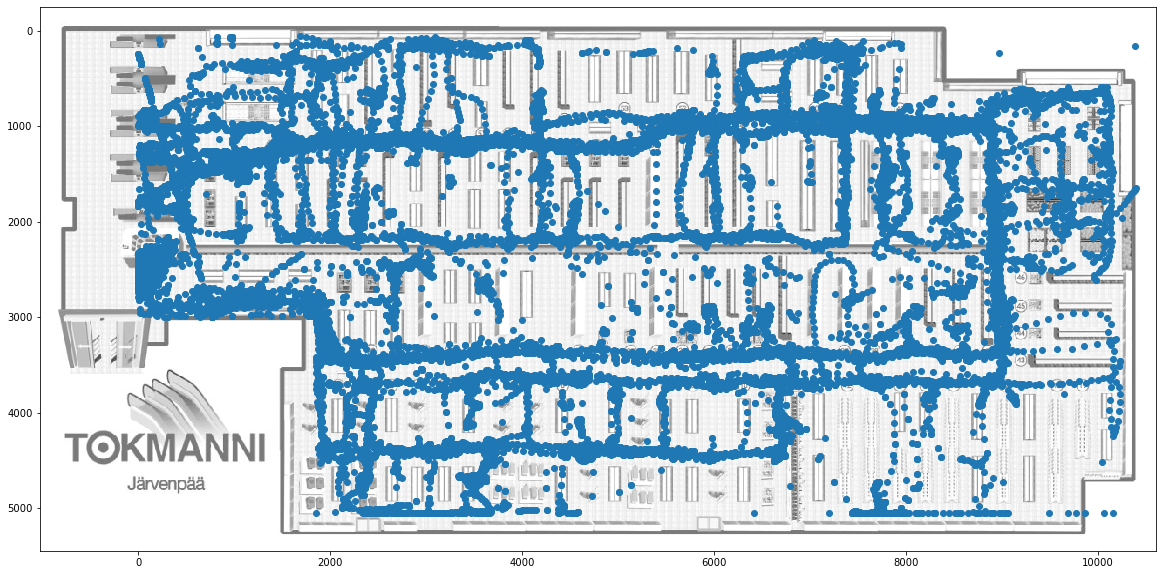

In [59]:
img = plt.imread("pic.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=(-1025,10600,5450,-250),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10] # Kuvan koon säätö

plt.plot(table.X, table.Y, 'o')



#plt.plot(np.diff(koordinaatit.Y))

In [ ]:
img = plt.imread("pic.png")
fig, ax = plt.subplots()
ax.imshow(img,aspect='auto')
plt.plot(table.X, table.Y, 'o')

In [ ]:
simple_koordinaatit = rdp(koordinaatit[['X', 'Y']].values, epsilon=1)
#print("{} pisteitä vähennetty {}!".format(koordinaatit.shape[0], simple_koordinaatit.shape[0]))
#plt.plot(simple_koordinaatit[:, 0], simple_koordinaatit[:, 1])
#plt.plot(simple_koordinaatit[:, 0], simple_koordinaatit[:, 1], 'ro')

print("{} pistettä -> {}".format(koordinaatit.shape[0], simple_koordinaatit.shape[0]))
img = plt.imread("pic.png")
fig, ax = plt.subplots()



ax.imshow(img, extent=(-1025,10680,5450,-250),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]
ax.plot(simple_koordinaatit[:, 0], simple_koordinaatit[:, 1], color ='blue')
plt.plot(simple_koordinaatit[:, 0], simple_koordinaatit[:, 1], 'ro')

In [ ]:


img = plt.imread("pic.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=(-1025,10680,5450,-250),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10]
ax.plot(x, y, '--', color ='blue')



#sizes = 1000


#plt.scatter(x, y, c="red", s=sizes, alpha=0.2) 

In [ ]:

# 1x ja 1y about 0.01m
aikapaikka = pd.DataFrame(columns=list('XY'), index=table['T'].values)
aikapaikka['X'] = table['X'].values
aikapaikka['Y'] = table['Y'].values

print(aikapaikka)

aikapaikka['Aika'] = aikapaikka.index.asi8

matka = aikapaikka.diff().fillna(0.)

#Trigonometria
matka['Matka'] = np.sqrt(matka.X**2 + matka.Y**2)

matka['ms'] = matka.Matka / (matka.Aika / 1e9)

matka['kmh'] = matka.ms * 3.6
print(matka)


In [ ]:


matka['X'] = aikapaikka['X']
matka['Y'] = aikapaikka['Y']
print(matka)


In [ ]:
matka = matka.dropna()
print(matka)


In [ ]:
matka['ms'].mean(axis = 0)

In [ ]:
#simple_aikapaikka = rdp(aikapaikka[['X', 'Y']].values, epsilon=0.1)
img = plt.imread("pic.png")
fig, ax = plt.subplots()
implot = plt.imshow(img, extent=(-1025,10680,5450,-250),aspect='auto')
#plt.rcParams['figure.figsize'] = [20,10] # Kuvan koon säätö

plt.xlim(-1025, 10680)
plt.ylim(5450, -250)


#plt.plot(simple_aikapaikka[:, 0], simple_aikapaikka[:, 1], 'ro')
#ax.plot(simple_aikapaikka[:, 0], simple_aikapaikka[:, 1], color ='blue')
plt.plot(matka['X'], matka['Y'], '--')


In [ ]:

#maanantai = aikapaikka
#for i in range(len(aikapaikka)):
#    if (aikapaikka.index[i].dayofyear != 85):
#        #print(aikapaikka.index[i])
#        temp = maanantai.index[i]
#        maanantai = maanantai.drop(index=temp)
        
        
#data.insert(2, "Type New", Type_new)
#import math  
#def matkametreina(x1,y1,x2,y2):
#    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2) / 161
#    matka['Metreina'] = np.sqrt(matka.X**2 + matka.Y**2)
#    return dist

#metreina=[]



#for i in range(len(matka['X']) - 1):
#    x1 = matka['X'][i]
#    y1 = matka['Y'][i]
#    x2 = matka['X'][i+1]
#    y2 = matka['Y'][i+1]
#    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2) / 161
#    metreina.append(dist)
    
#metreina.append(dist)



In [ ]:
import math  

metreina = []
def matkametreina(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
    return dist / 161

for i in range(len(matka) - 1):
    x1 = matka['X'][i]
    y1 = matka['Y'][i]
    x2 = matka['X'][i+1]
    y2 = matka['Y'][i+1]
    metreina.append(matkametreina(x1, y1, x2, y2))
metreina.append(matkametreina(x1, y1, x2, y2))
matka["metreina"] = metreina

In [ ]:

matka["metreina"] = metreina

print(len(matka))
print(len(metreina))

In [ ]:
matka = matka[matka.metreina < 20]
matka = matka[matka.ms < 20]
matka = matka[matka['Matka'] < 300]
#matka = matka[matka['kmh'] < 5 ]
print(matka)

In [ ]:
simple_koordinaatit = rdp(matka[['X', 'Y']].values, epsilon=0.1)
#print("{} pisteitä vähennetty {}!".format(koordinaatit.shape[0], simple_koordinaatit.shape[0]))
#plt.plot(simple_koordinaatit[:, 0], simple_koordinaatit[:, 1])
#plt.plot(simple_koordinaatit[:, 0], simple_koordinaatit[:, 1], 'ro')

print("{} pistettä -> {}".format(koordinaatit.shape[0], simple_koordinaatit.shape[0]))
img = plt.imread("pic.png")
fig, ax = plt.subplots()



ax.imshow(img, extent=(-1025,10680,5450,-250),aspect='auto')
plt.rcParams['figure.figsize'] = [20,10] # Kuvan koon säätö
ax.plot(simple_koordinaatit[:, 0], simple_koordinaatit[:, 1], color ='blue')
plt.plot(simple_koordinaatit[:, 0], simple_koordinaatit[:, 1], 'ro')

In [ ]:
img = plt.imread("pic.png")
fig, ax = plt.subplots()
implot = plt.imshow(img, extent=(-1025,10680,5450,-250),aspect='auto')
#plt.rcParams['figure.figsize'] = [20,10] # Kuvan koon säätö

plt.xlim(-1025, 10680)
plt.ylim(5450, -250)


#plt.plot(simple_aikapaikka[:, 0], simple_aikapaikka[:, 1], 'ro')
#ax.plot(simple_aikapaikka[:, 0], simple_aikapaikka[:, 1], color ='blue')
plt.plot(matka['X'], matka['Y'], '--')

In [ ]:
print(matka)

In [ ]:
prev = 0
val = 0
def calc_velocity(time_start, time_end):
    #diff_time = time_start - time_end
    diff_time = np.datetime64(time_start) - np.datetime64(time_end)
    diff_time.item().total_seconds()
    diff_time = diff_time / np.timedelta64(1, 's')
    if(diff_time > 0.1):
        return diff_time
    else:
        return 1
x = 0
for i in range(len(df.x)):
   # print(abs(df.iloc[i+1, 3] - abs(df.iloc[i, 3])))
    #print(abs(df.index[i+1]) - abs(df.index[i]))
    if(i < len(df.x)):
        #print(i , " " , x, " ", len(df.x))
        value1 = calc_velocity(df.iloc[i-x, 1], df.iloc[i-(1+x), 1])
        value2 = int((abs(df.iloc[i-x, 2])) - prev)
        val =  value2 / value1
        if (val > 60 or value2 > 100):
            df.drop([df.index[i-x]], axis = 0, inplace = True)
            prev = abs(df.iloc[i-x, 2])
            x +=1
        else:
            prev = abs(df.iloc[i-x, 2])
x = 0
for i in range(len(df.y)):
   # print(abs(df.iloc[i+1, 3] - abs(df.iloc[i, 3])))
    #print(abs(df.index[i+1]) - abs(df.index[i]))
    if(i < len(df.y)):
        value1 = calc_velocity(df.iloc[i-x, 1], df.iloc[i-(1+x), 1])
        value2 = int((abs(df.iloc[i-x, 3]))-prev)
        val = value2 / value1    
        if (val > 60 or value2 > 100):
            df.drop([df.index[i-x]], axis = 0)
            prev = abs(df.iloc[i-x , 3])
            x +=1
        else:
            prev = abs(df.iloc[i-x, 3])
    #print(prev)
    #if (abs(df.iloc[i+1, 3] - abs(df.iloc[i, 3]))) > 400:
        #print("We int")
        
print(len(df.x))
#devx = [df.iloc[i + 1, 2] - df.iloc[i, 2] for i in range(len(df.x)-1)]
devx = []
for i in range(len(df.x)):
    value1 = calc_velocity(df.iloc[i, 1], df.iloc[i-1, 1])
    val = int((abs(df.iloc[i, 2]) - prev)) / value1
    #print(val)
    devx.append(val)
    prev = abs(df.iloc[i, 2])

xmean = np.mean(devx, axis=0)
xsd = np.std(devx, axis=0)
print(xmean)
print(xsd)
i = 0
final_list = [x for x in df.x if (abs(x) > xmean - 0.5 * xsd)]
#final_list = [x for x in final_list if (x < xmean + 0. * xsd)]
for x in final_list:
    if(x < xmean + 6.75 * xsd):
        df.drop([df.index[i]], axis = 0, inplace = True)
        i -= 1
    i += 1
i = 0
#devy = [df.iloc[i + 1, 3] - df.iloc[i, 3] for i in range(len(df.y)-1)]
devy = []
for i in range(len(df.y)):
    value1 = calc_velocity(df.iloc[i, 1], df.iloc[i-1, 1])
    val = int((abs(df.iloc[i, 3]) - prev)) / value1
    #print(val)
    devy.append(val)
    prev = abs(df.iloc[i, 3])
ymean = np.mean(devy, axis=0)
ysd = np.std(devy, axis=0)
print(ymean)
print(ysd)
final_list1 = [y for y in df.y if (abs(y) > ymean - 0.5 * ysd)]
#final_list = [y for y in final_list if (y < ymean + 0.2 * ysd)]
i = 0
print(len(df.y))
for y in final_list1:
    if(y < ymean + 6.75 * ysd):
        df.drop([df.index[i]], axis = 0, inplace = True)
        i -= 1
    i += 1

In [ ]:

# import the required packages
from scipy import stats, integrate
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
# load the coordinates file
x = koordinaatit.X

y = koordinaatit.Y
 
# call the kernel density estimator function
#ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=False)
# the function has additional parameters you can play around with to fine-tune your heatmap, e.g.:
ax = sns.kdeplot(x, y, kernel="gau", bw = 50, cmap="Reds", n_levels = 120, shade=False, shade_lowest=False, gridsize=50)



img = plt.imread("pic.png")


plt.rcParams['figure.figsize'] = [20,10]



# plot your KDE
ax.set_frame_on(False)
plt.xlim(-1025, 10680)
plt.ylim(5450, -250)
plt.axis('off')
#plt.show()
ax.imshow(img, extent=(-1025,10680,5450,-250),aspect='auto')


# save your KDE to disk
fig = ax.get_figure()
fig.savefig('kde.png', transparent=True, bbox_inches='tight', pad_inches=0)